In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("csvfiles/50_startsup.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [6]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


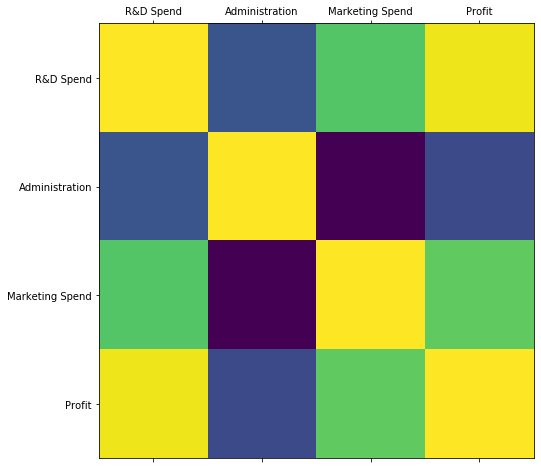

In [7]:
# plotting correlation
def plot_corr(data,size=8):
    corr=data.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    
plot_corr(data)    
    

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation. We can see R&D spend has maximum correlation with profit ,Marketing spend has medium,but  administration has very low correlation with profit so we can ignore it from input data because it has no effect on our model.

In [8]:
x = data[["R&D Spend","Marketing Spend"]]
y = data.iloc[:,4:]
x.head()
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

In [11]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
pred_y = model.predict(test_x)

In [13]:
score = model.score(test_x,test_y)
score

0.9414951403737016

In [14]:
model.coef_

array([[0.77674826, 0.02045702]])

In [15]:
model.intercept_

array([50765.16960234])

In [16]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(pred_y,test_y)
mse

179434584.00279498

Testing model prediction on a user given value

In [17]:
my_pred=model.predict([[175000,552627]])
my_pred

array([[198001.21754249]])

In [20]:
175000*0.77674826 + 552627*0.02045702 +47765.32900149 

195001.37609303

backword elemination